
# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I'll analyze data that collected from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The dataset comes with additional information to each appointment such as:

- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- ‘No-show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

The original dataset has been sourced from Kaggle **Dataset: Medical Appoiment No Shows** on 29th October 2018.


### Research Questions

The first part I do analysis to dicover if there is any relationship between patient inormation and status if the patient will come to the appoiment or not 

The second part I will analysis if there are opportunities to improve .. 

for what cause that make the patients .. .
relationship between varable 
predicuate 

1- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?  ***

What is the relationship between the following personal parts of information and no-shows? ***
Diseases
Neighborhood

2- Did SMS-reminders decrease the proportion of patients not showing up?

3- Wat is the overall appointment show-up vs. no show-up rate?

4- What is the patient age distribution of no-shows versus shows?

5- Do appointment no-shows occur on specific days of the week? 

6- Which neighborhoods have the highest number of no-shows?


### Methodology

The general methodology followed to perform the investigation:

#### Data Wrangling.
Moving raw data into dataframes for manipulation.
#### Data Cleaning
Transforming data to uniform format.
#### Data Analysis
Exploring data and patterns.
#### Data Visualization
Visualizing and drawing conclusions. 


## The Investigation

In [179]:
# Importing of the necessary Library files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Importing the Dataset

> Extracting the data stored as rows and columns into a DataFrame.


In [180]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [181]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


>### Observations / Changes Needed
>- Some columns name are mispellings and incorporated
>- Extract date and day of week from ScheduledDay and AppointmentDay

In [182]:
# To check if there is Null values and data types for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>### Observations / Changes Needed
> - convert data type of gender and No-show column to categoral
> - convert data type of ScheduledDay and AppointmentDay column to datetime
> - convert data type of PatientId and AppointmentDay column to object
> - convert data type of Scholarship,Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show to boolean.
> - convert data type of SMS recieved column to boolean

In [183]:
# To check if there is any duplicate rows
print(sum(df.duplicated()))

0


In [184]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>### Observations / Changes Needed
> - minmum value in age column is -1

## Data Wrangling

### Issue (1):  Some columns name are mispellings and incorporated
    
### Define 
Fix columns name 

In [185]:
df.sample(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
33051,5.832554e+12,5676225,F,2016-05-09T15:15:38Z,2016-05-09T00:00:00Z,3,BELA VISTA,1,0,0,0,0,0,No
66248,9.987148e+13,5519187,F,2016-03-29T08:31:45Z,2016-05-06T00:00:00Z,13,JARDIM CAMBURI,0,0,0,0,0,0,Yes
31094,8.883765e+13,5602318,M,2016-04-19T14:44:52Z,2016-05-03T00:00:00Z,56,BENTO FERREIRA,0,0,0,0,0,0,No


### Code

In [186]:
df.rename(columns={'Hipertension': 'Hypertension',
                   'Handcap': 'Handicap',
                   'No-show': 'No_show' }, inplace= True)

### Test

In [187]:
df.sample(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
44292,3.469340e+14,5520373,M,2016-03-29T09:53:35Z,2016-05-25T00:00:00Z,23,VILA RUBIM,0,0,0,0,0,1,No
63017,3.927395e+14,5411439,M,2016-03-01T07:43:25Z,2016-05-02T00:00:00Z,53,JARDIM CAMBURI,0,0,0,0,0,1,Yes
85958,5.935520e+14,5780561,F,2016-06-07T08:14:22Z,2016-06-07T00:00:00Z,1,CONSOLAÇÃO,0,0,0,0,0,0,No


### Issue (2):  Correct data types for some columns

### Define 
- convert data type of gender column to categoral
- convert data type of ScheduledDay and AppointmentDay columns to datetime
- convert data type of PatientId column to object
- convert data type of No-show column to int 

### Code

In [188]:
df['Gender'] = df['Gender'].astype('category')


df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

df['SMS_received'] = df['SMS_received'].astype('bool', inplace=True)

In [189]:
df["No_show"] = np.where((df.No_show=="Yes"), 1, 0)

### Test 

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null category
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null bool
No_show           110527 non-null int64
dtypes: bool(1), category(1), datetime64[ns](2), int64(7), object(3)
memory usage: 10.3+ MB


### Issue (3):  Extract date and day of week from ScheduledDay and AppointmentDay

### Define 

then convert data type of ScheduledDay and AppointmentDay columns to datetime


### Code

In [191]:
# Extract the date 
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x.strftime('%m-%d-%Y')) 
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: x.strftime('%m-%d-%Y'))

In [192]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.98724998243e+13,5642903,F,04-29-2016,04-29-2016,62,JARDIM DA PENHA,0,1,0,0,0,False,0
1,5.58997776694e+14,5642503,M,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,0,0,0,0,False,0
2,4.26296229995e+12,5642549,F,04-29-2016,04-29-2016,62,MATA DA PRAIA,0,0,0,0,0,False,0
3,867951213174.0,5642828,F,04-29-2016,04-29-2016,8,PONTAL DE CAMBURI,0,0,0,0,0,False,0
4,8.84118644818e+12,5642494,F,04-29-2016,04-29-2016,56,JARDIM DA PENHA,0,1,1,0,0,False,0


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null category
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null bool
No_show           110527 non-null int64
dtypes: bool(1), category(1), int64(7), object(5)
memory usage: 10.3+ MB


In [194]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Extract the day of weak
df['schedule_dow'] = df['ScheduledDay'].dt.weekday_name
df['appointment_dow'] = df['AppointmentDay'].dt.weekday_name

### Test 

In [195]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,schedule_dow,appointment_dow
0,2.98724998243e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,False,0,Friday,Friday
1,5.58997776694e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,False,0,Friday,Friday
2,4.26296229995e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,False,0,Friday,Friday
3,867951213174.0,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,False,0,Friday,Friday
4,8.84118644818e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,False,0,Friday,Friday


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
PatientId          110527 non-null object
AppointmentID      110527 non-null object
Gender             110527 non-null category
ScheduledDay       110527 non-null datetime64[ns]
AppointmentDay     110527 non-null datetime64[ns]
Age                110527 non-null int64
Neighbourhood      110527 non-null object
Scholarship        110527 non-null int64
Hypertension       110527 non-null int64
Diabetes           110527 non-null int64
Alcoholism         110527 non-null int64
Handicap           110527 non-null int64
SMS_received       110527 non-null bool
No_show            110527 non-null int64
schedule_dow       110527 non-null object
appointment_dow    110527 non-null object
dtypes: bool(1), category(1), datetime64[ns](2), int64(7), object(5)
memory usage: 12.0+ MB


### Issue (4):  minmum value in age column is -1

### Define 

Fill patient's row with age -1 with mean age value

### Code

In [197]:
meanAge = df['Age'].mean()
meanAge

37.088874211731067

In [198]:
df.Age[df['Age'] <= 0] = meanAge

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Test 

In [199]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,No_show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,38.276780,0.098266,0.197246,0.071865,0.030400,0.022248,0.201933
std,22.104561,0.297675,0.397921,0.258265,0.171686,0.161543,0.401444
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 ( What is the proportion of appointment shows versus no shows?)

In [200]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [201]:
# Create a new data frem to hold count and proportion for show and no show 
new_df = df.groupby('No_show')['No_show'].agg(['count'])
new_df.reset_index(inplace=True)
new_df.columns = ['appt_status', 'total']
new_df.iloc[0,0] = "No Show"
new_df.iloc[1,0] = "Show"

In [202]:
nos_prop = new_df.iloc[0,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])
shows_prop = new_df.iloc[1,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])

In [203]:
new_df['proportion'] = [nos_prop, shows_prop]
new_df.head()

,appt_status,total,proportion
0,No Show,88208,0.798067
1,Show,22319,0.201933


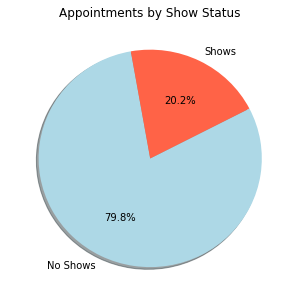

In [204]:
# Pie chart to repersent proportion of appointment shows versus no shows

# Data to plot
labels = ['No Shows', 'Shows']
sizes = [nos_prop, shows_prop]
colors = ['lightblue', 'tomato']
# explode = (0, 0.1)

# The plot
# autopct to repersent the percentage in the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=100)
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#        autopct='%1.1f%%', shadow=True, startangle=100)
plt.title('Appointments by Show Status')
# plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(5,5);


### Research Question 2  (Replace this header name!)

In [205]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

no_shows = df.query('No_show == "1"')
shows = df.query('No_show == "0"')

age_df_nos = no_shows['Age'].mean()
age_df_nos

35.379532712993239

In [206]:
age_df_shows = shows['Age'].mean()
age_df_shows

39.00986105668683

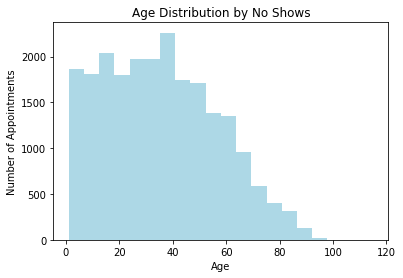

In [207]:
# Histogram plot

plt.hist(no_shows['Age'], stacked=True, bins=20, color='lightblue')
plt.title('Age Distribution by No Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

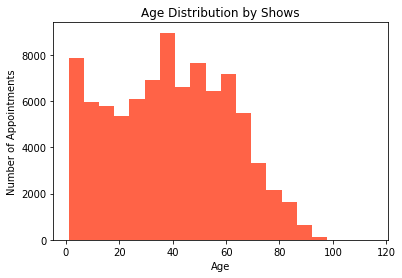

In [208]:
plt.hist(shows['Age'], stacked=True, bins=20, color='tomato')
plt.title('Age Distribution by Shows')
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

### Research Question 3  (Which neighborhoods have the highest number of no-shows?)

> Determine if the geography location affects of appointment no-shows

In [209]:
# Top 10 neighbourhood that show appoiment
shows_by_hood = shows.groupby("Neighbourhood")["No_show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_hood.head(10)

,Neighbourhood,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635
10,CENTRO,2631
35,ITARARÉ,2591
77,TABUAZEIRO,2559
68,SANTO ANTÔNIO,2262
8,BONFIM,2223


In [210]:
# Top 10 neighbourhood that no show appoiment
noshow_by_hood = no_shows.groupby("Neighbourhood")["No_show"].count().reset_index(name="count").sort_values("count", ascending=False)
noshow_by_hood.head(10)

,Neighbourhood,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703
40,JESUS DE NAZARETH,696
39,JARDIM DA PENHA,631
9,CARATOÍRA,591
77,TABUAZEIRO,573
8,BONFIM,550


### Research Question 4  (Do appointment no-shows occur on specific days of the week?)

> Determine if specific day of weak affects of appointment no-shows

In [211]:
# Data to plot

nos_mon = no_shows.query('appointment_dow == "Monday"')
nos_mon = nos_mon['appointment_dow'].count()

nos_tue = no_shows.query('appointment_dow == "Tuesday"')
nos_tue = nos_tue['appointment_dow'].count()

nos_wed = no_shows.query('appointment_dow == "Wednesday"')
nos_wed = nos_wed['appointment_dow'].count()

nos_thu = no_shows.query('appointment_dow == "Thursday"')
nos_thu = nos_thu['appointment_dow'].count()

nos_fri = no_shows.query('appointment_dow == "Friday"')
nos_fri = nos_fri['appointment_dow'].count()

nos_sat = no_shows.query('appointment_dow == "Saturday"')
nos_sat = nos_sat['appointment_dow'].count()

nos_sun = no_shows.query('appointment_dow == "Sunday"')
nos_sun = nos_sun['appointment_dow'].count()

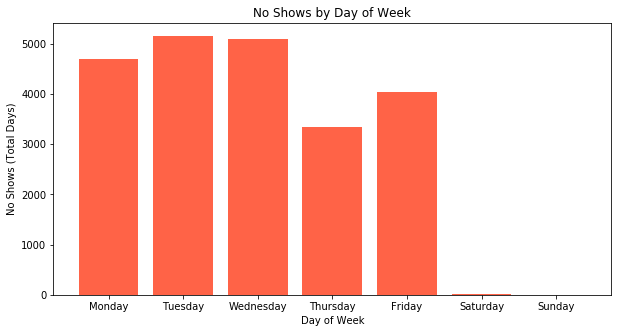

In [212]:

# The plot

locations = [1, 2, 3, 4, 5, 6, 7]
heights = [nos_mon, nos_tue, nos_wed, nos_thu, nos_fri, nos_sat, nos_sun]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.bar(locations, heights, tick_label=labels, color='tomato')
plt.title('No Shows by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('No Shows (Total Days)')

fig = plt.gcf()
fig.set_size_inches(10,5);

### Research Question 5  (Did SMS-reminders decrease the proportion of patients not showing up?)

> Determine if SMS reminder affects of appointment no-shows

In [213]:
df.sample(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,schedule_dow,appointment_dow
100707,4.65594929398e+12,5762765,F,2016-06-02,2016-06-02,57.0,TABUAZEIRO,0,1,0,0,0,False,0,Thursday,Thursday
33264,1.18847437183e+14,5554846,F,2016-04-07,2016-05-05,26.0,JOANA D´ARC,0,0,0,0,0,True,1,Thursday,Thursday


In [217]:
df['No_show'] = df['No_show'].astype('bool', inplace=True)


# make two data frame, one for patients who recieve SMS and another for doesn't recieve
df_sms_received = df[(df['SMS_received'] == True)]
df_no_sms_received = df[(df['SMS_received'] == False)]


In [218]:
#Grouping by No-show, to calculate the amounts
sms_received = df_sms_received.groupby(['No_show']).sum()['SMS_received']
sms_received


No_show
False    25698.0
True      9784.0
Name: SMS_received, dtype: float64

In [219]:
# As group function in combination with boolean values only works with "True" values, we need to invert 
# the column SMS_received in this case.

# rename SMS recieved column
df_no_sms_received.rename(columns={"SMS_received":"SMS_not_received"}, inplace=True)
# rename values of SMS recieved column
df_no_sms_received['SMS_not_received'].replace({False: True}, inplace = True)                                                 

# Grouping by No-show, to calculate the amounts
no_sms_received = df_no_sms_received.groupby(['No_show']).sum()['SMS_not_received']

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [220]:
no_sms_received

No_show
False    62510.0
True     12535.0
Name: SMS_not_received, dtype: float64

In [221]:
print(sms_received)
print('\n')
print(no_sms_received)
print('\n')
print(df['AppointmentDay'].count() == sum(sms_received) + sum(no_sms_received))

No_show
False    25698.0
True      9784.0
Name: SMS_received, dtype: float64


No_show
False    62510.0
True     12535.0
Name: SMS_not_received, dtype: float64


True


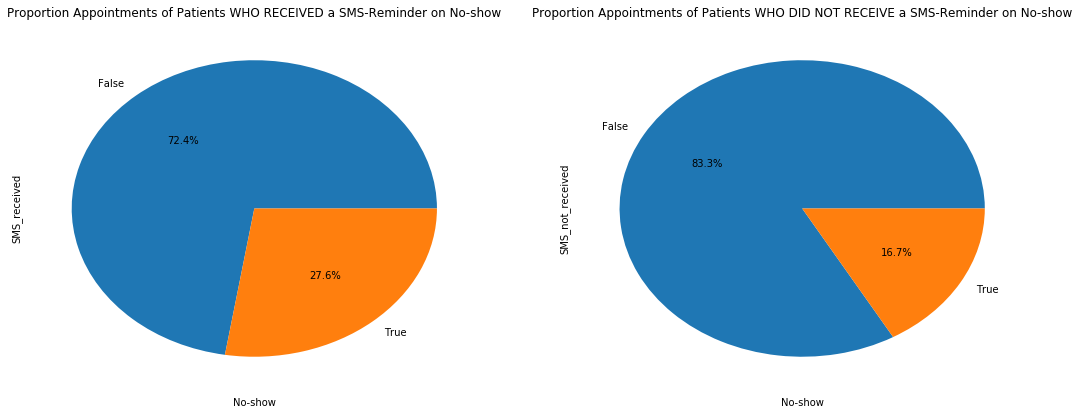

In [222]:
# Calculate the Proportion for two varable SMS recieved and not 
sms_received_prop = sms_received / sum(sms_received) * 100
no_sms_received_prop = no_sms_received / sum(no_sms_received) * 100

# Styling the graphs
fig = plt.figure(figsize=(18,15))

# Make the graph two parts
plt.subplot(2,2,1)
sms_received.plot.pie(autopct='%.1f%%')
plt.title('Proportion Appointments of Patients WHO RECEIVED a SMS-Reminder on No-show')
plt.xlabel('No-show')

plt.subplot(2,2,2)
no_sms_received.plot.pie(autopct='%.1f%%')
plt.title('Proportion Appointments of Patients WHO DID NOT RECEIVE a SMS-Reminder on No-show')
plt.xlabel('No-show');

<a id='conclusions'></a>
## Conclusions

Nearly 80% of all appointments investigated were no-shows appoiments

#### Limitation
Missing features that could be useful to get more sure such as if the patient is employeed or not , or whether the patient have a series medical issue or not

#### Findings:

What is the patient age distribution of no-shows versus shows?
- Two histogram plots are created to see if there is relationship between patients' age and status if the patients will show or not to their appoiments. The mean age for patients who don't show the appoiments is about 35 compresed to the patients who show the appoiments is about 39. No significant differences to note.

Which neighborhoods have the highest number of no-shows?
- Top ten neighborhood in which the appointment took place for both patients who show up and don't show up the appoiments were created to see if there are certain areas have higher no-show rates. JARDIM CAMBURI and MARIA ORTIZ were the most neighborhoods in both the no-shows and shows segment

Do appointment no-shows occur on specific days of the week?
- Appointment no-shows occurred the most on Tuesdays and on Thursdays. Overall, appointments early in the week have a higher no-show rate. We can concluate that patients don't show up the appoiment in working days.


Did SMS-reminders decrease the proportion of patients not showing up?
- The proportion of no-shows was nearly double when an SMS message was NOT sent to the patient before their appointment day. There is a correlation between SMS messaging and appointment show rate. It would be worth performing additional analyses to understand how strong this correlation is.



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [147]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0